In [2]:
from dask import dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

%matplotlib inline

path = '../data/'

df_sds011 = dd.read_csv(path + 'processed*sds011*').compute()
df_dht22 = dd.read_csv(path + 'processed*dht22*').compute()

df_sds011['timestamp'] = pd.to_datetime(df_sds011['timestamp'], format='%Y-%m-%dT%H:%M:%S')
df_dht22['timestamp'] = pd.to_datetime(df_dht22['timestamp'], format='%Y-%m-%dT%H:%M:%S')


#Problems when remove index category because of multi index
#df_sds011['location'] = df_sds011['location'].astype('category')
#df_dht22['location'] = df_dht22['location'].astype('category')

df_sds011 = df_sds011.set_index(['location', 'timestamp'])
df_dht22 = df_dht22.set_index(['location', 'timestamp'])

df_sds011 = df_sds011.sort_index()
df_dht22 = df_dht22.sort_index()

df_sds011 = df_sds011[['P1', 'P2']]
df_dht22 = df_dht22[['temperature', 'humidity']]

,P1,P2
Mon,22.844590,14.005148
Tues,23.341005,13.832031
Wed,28.338281,16.226639
Thurs,28.860106,16.718784
Fri,29.468317,16.746784
Sat,30.031308,17.272664
Sun,25.269976,15.251830


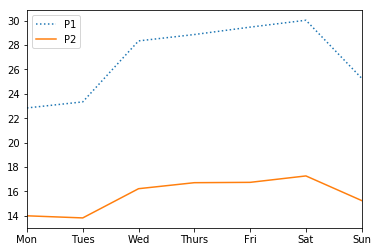

In [72]:
level_values = df_sds011.index.get_level_values
#by_weekday = df_sds011.groupby([level_values(0)] + [level_values(1).dayofweek]).mean()

by_weekday = df_sds011.groupby(level_values(1).dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '-'])
by_weekday

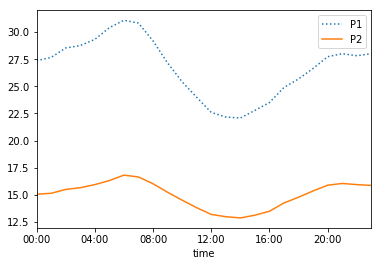

In [67]:
level_values = df_sds011.index.get_level_values
by_time = df_sds011.groupby(level_values(1)).mean()
by_time = by_time.resample('60min').mean()
by_time = by_time.groupby(by_time.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '-'])